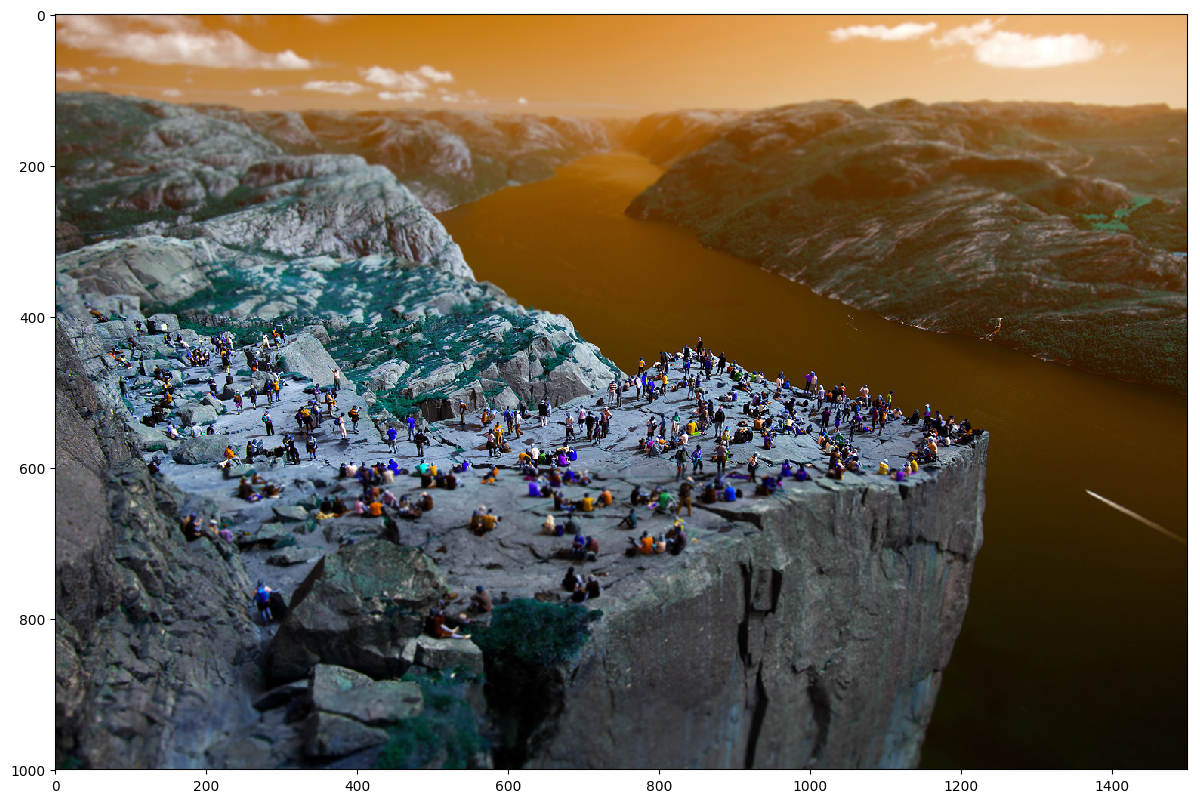

In [36]:
%matplotlib inline

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import dlib
# Read in image

def blend_with_mask_matrix(src1, src2, mask):
    res_channels = []
    for c in range(0, src1.shape[2]):
        a = src1[:, :, c]
        b = src2[:, :, c]
        m = mask[:, :, c]
        res = cv2.add(
            cv2.multiply(b, cv2.divide(np.full_like(m, 255) - m, 255.0, dtype=cv2.CV_32F), dtype=cv2.CV_32F),
            cv2.multiply(a, cv2.divide(m, 255.0, dtype=cv2.CV_32F), dtype=cv2.CV_32F),
           dtype=cv2.CV_8U)
        res_channels += [res]
    res = cv2.merge(res_channels)
    return res

def blur_image(cv_image, radius, center, gaussian_core, sigma_x):
    blurred = cv2.GaussianBlur(cv_image, gaussian_core, sigma_x)
    circle_not_mask = np.zeros_like(cv_image)
    cv2.rectangle(circle_not_mask, (0,400),(1500,600) ,(255, 255, 255),-1)
    cv2.GaussianBlur(circle_not_mask, (5, 5), 0, dst=circle_not_mask)
    res = blend_with_mask_matrix(cv_image, blurred, circle_not_mask)
    return res

def blur_image2(cv_image, radius, center, gaussian_core, sigma_x):
    blurred = cv2.GaussianBlur(cv_image, gaussian_core, sigma_x)
    circle_not_mask = np.zeros_like(cv_image)
    cv2.rectangle(circle_not_mask, (0,250),(1500,890) ,(255, 255, 255),-1)
    cv2.GaussianBlur(circle_not_mask, (5, 5), 0, dst=circle_not_mask)
    res = blend_with_mask_matrix(cv_image, blurred, circle_not_mask)
    return res


image = cv2.imread('./tilt-shift/images/norway.jpg')

# res = blur_image(image, radius, center, (325,325), 0)
res = blur_image(image, 400, (850,600), (5,5), 0)
res = blur_image2(res, 400, (850,600), (7,7), 0)

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100
# plt.imshow(blur)
plt.imshow(res)
plt.show()

